In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=30

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\golla\asreetha\potato_diesease\PlantVillage",
    seed=123,
    shuffle = True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)
#68 batches and each batch contains 32 images

68

In [7]:
def verify_the_ds(ds1,n=12):
   plt.figure(figsize=(10,10))
   for image_batch , label_batch in ds1.take(1):
        for i in range(n):
            plt.subplot(3,4,i+1)
            plt.imshow(image_batch[i].numpy().astype("uint8"))
            plt.axis("off")
            plt.title(class_names[label_batch[i]])

In [63]:
len(dataset)

68

In [74]:
#68*.80 = 54.400000000000006
#68*.10 = 6.800000000000001
train_size = .80
test_size = .10

In [65]:
train_ds = dataset.take(int(len(dataset)*train_size))
len(train_ds)

54

In [66]:
test_ds = dataset.skip(len(train_ds))
len(test_ds)

14

In [75]:
val_ds = test_ds.take(int(len(dataset)*test_size))
len(val_ds)

6

In [76]:
test_ds = test_ds.skip(len(val_ds))
len(test_ds)

8

In [8]:
def get_dataset_partitions_tf(ds,train_split = 0.8,val_split = 0.1,test_split = 0.1):
    train_ds = ds.take(int(len(ds)*train_split))
    test_ds = ds.skip(len(train_ds))
    val_ds = test_ds.take(int(len(ds)*test_split))
    test_ds = test_ds.skip(len(val_ds))
    
    return (train_ds,test_ds,val_ds)

In [9]:
train_ds,test_ds,val_ds = get_dataset_partitions_tf(dataset)

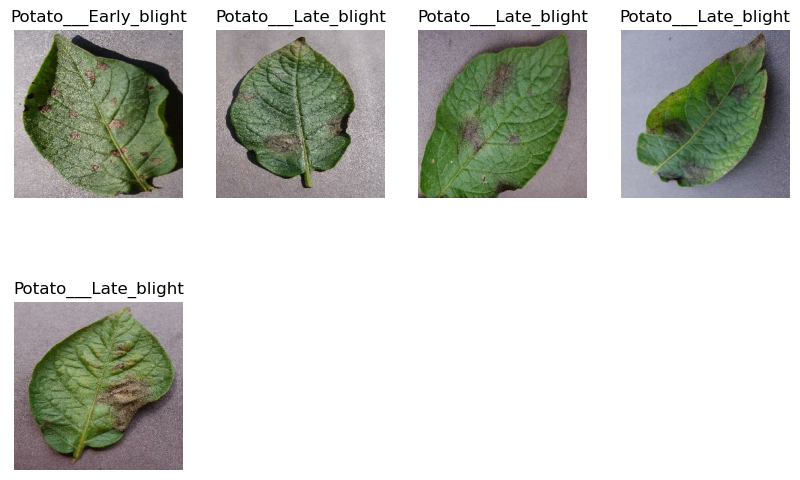

In [86]:
verify_the_ds(val_ds,5)

In [10]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# scalling the array

In [11]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [12]:
resize_and_rescale = Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])

# Data Augumentation

In [13]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

# cnn model

In [14]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

C:\Users\golla\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
optimizer = 'adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy']
)

In [17]:
history = model.fit(
train_ds,
batch_size = BATCH_SIZE,
validation_data = val_ds,
    verbose = 1,
    epochs = 10

)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.5138 - loss: 0.9333 - val_accuracy: 0.6406 - val_loss: 0.7439
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.6996 - loss: 0.7002 - val_accuracy: 0.8490 - val_loss: 0.4267
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.8482 - loss: 0.3857 - val_accuracy: 0.8333 - val_loss: 0.3908
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 175s 3s/step - accuracy: 0.8426 - loss: 0.3735 - val_accuracy: 0.9375 - val_loss: 0.1920
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 494s 9s/step - accuracy: 0.9114 - loss: 0.2265 - val_accuracy: 0.9323 - val_loss: 0.1984
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.9203 - loss: 0.2099 - val_accuracy: 0.9688 - val_loss: 0.1284
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 906ms/step - accuracy: 0.9512 - loss: 0.1256 - val_accuracy: 0.9583 - val_loss: 0.1406
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9455 - loss: 0.1303 - val_accuracy: 0.9531 - 

In [117]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [119]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 614ms/step - accuracy: 1.0000 - loss: 0.0235


In [1]:
for image_batch ,label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = class_names[label_batch[0]]

    print(plt.imshow(image_batch[0]))
    print("actual label:",class_names[label_batch[0]])
    batch_prediction = model.predict(image_batch)
    print("predicted_label:",batch_prediction[0])

NameError: name 'test_ds' is not defined